In [2]:
# import sys
# sys.path.append("../utils")
from utils.generate_field import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fft2, ifft2
import math
result_dir = '/home/zyou6474/tasks/channel_flow/outputs'

In [3]:
dims = [128, 128, 64]
fdims = [130, 128]
domain = [2*np.pi, np.pi, 1]
x, y, z = xyz(domain, dims)
dx = x[1]- x[0]

ld = np.linspace(0, domain[0]+2*dx, fdims[0])
fk_x = np.arange(130)*2*np.pi/domain[0]
fk_y = np.arange(128)*2*np.pi/domain[1]

half_kx_ind = math.floor(dims[0]/2)+1
half_kx = fk_x[:half_kx_ind]
scale_coeff = dims[0]*dims[1]

# FFTW test
This file is created to validate how FFTW function do the DFT on real array and back forward. The original 2d array is a gaussian pulse
$$
F(x, y) = \frac{1}{4dx\sqrt{2\pi}} e^{-\frac{1}{2}\frac{(x-x_0)^2}{16\mathrm{d} x^2}}.
$$


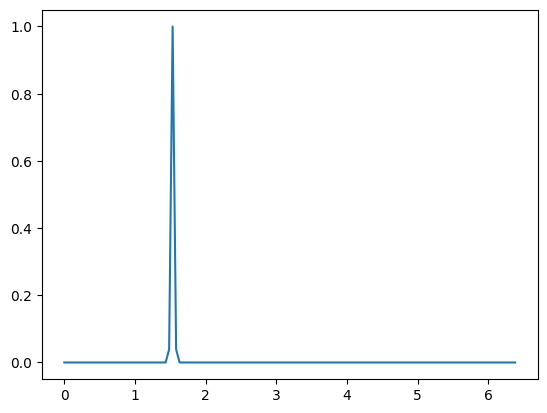

In [4]:
origin_fname = result_dir+r'/test_origin.00000001'
origin_f = read_array_from_file(origin_fname, shape=fdims)
plt.plot(ld, origin_f[:, 0])

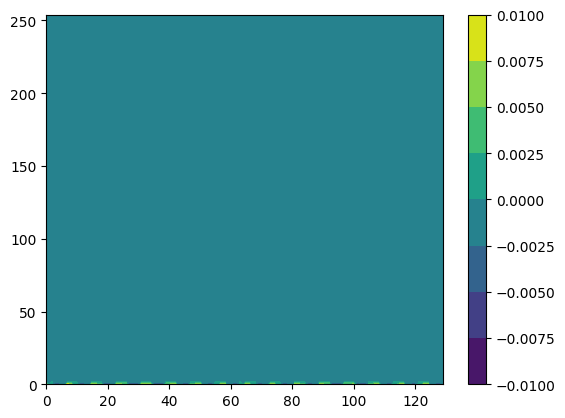

In [5]:
f_hat_fname = result_dir + r'/test_hat.00000001'
f_hat = read_array_from_file(f_hat_fname, shape=fdims, )
plt.contourf(fk_x, fk_y, f_hat.T)
plt.colorbar()
# plt.xlim(-10, 140)
# plt.ylim(-10, 140)

## Inverse Fourier Transform

**Scaling of FFT coefficient**

FFTW do not include the average over the domain in its function so we need to scale the coefficient before running the inverse fourier transform, 
$$
\hat{f} = \frac{1}{Nx Ny} \tilde{f}
$$

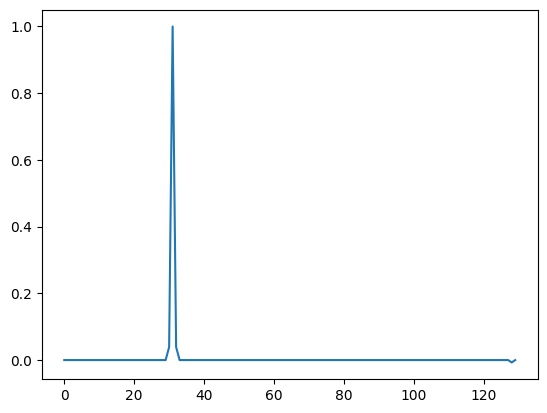

In [6]:
f_fname = result_dir + r'/test.00000001'
f = read_array_from_file(f_fname, shape=fdims, )
plt.plot(f[:, 0])

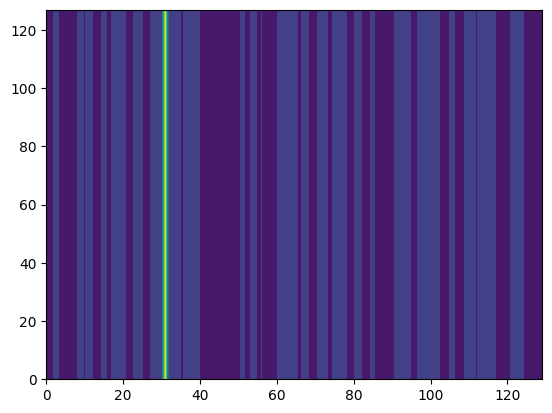

In [7]:
plt.contourf(f.T)

In [8]:
# TEST wavenumber
# Forward
f_hat_test = fft(f[:-2, 0])/dims[0]

# Inverse
f_hat_half = f_hat[::2, 0] + 1j*f_hat[1::2, 0]
f_hat_full = np.append(f_hat_half[:-1], np.conjugate(f_hat_half[:0:-1]))
f_test = ifft(f_hat_full)

/home/zyou6474/Projects/ERI/.venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


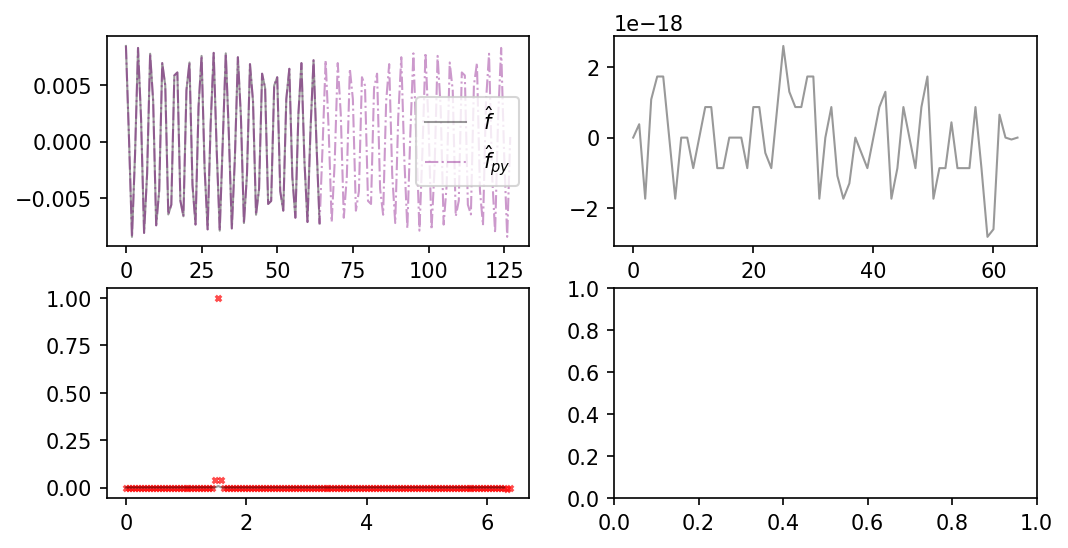

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(8, 4), dpi=150)
axes = axes.flatten()
axes[0].plot(half_kx, f_hat[::2, 0], color='black', alpha=0.4, linewidth=1, label='$\hat{f}$')
axes[0].plot(fk_x[:-2], f_hat_test, color='purple', alpha=0.4, linewidth=1, label='$\hat{f}_{py}$', linestyle='-.')
axes[0].legend()

error = f_hat[::2, 0] - f_hat_test[:65]
axes[1].plot(half_kx, error, color='black', alpha=0.4, linewidth=1, label='$\hat{f}$')

axes[2].plot(ld[:-2], f_test, label='reconstructed', color='black', alpha=0.4, linewidth=1)
axes[2].scatter(ld, f[:, 0], label='reconstructed', marker='x', s=7, alpha=.7, color='red')

Text(0.5, 1.0, 'Imaginary part of f_hat')

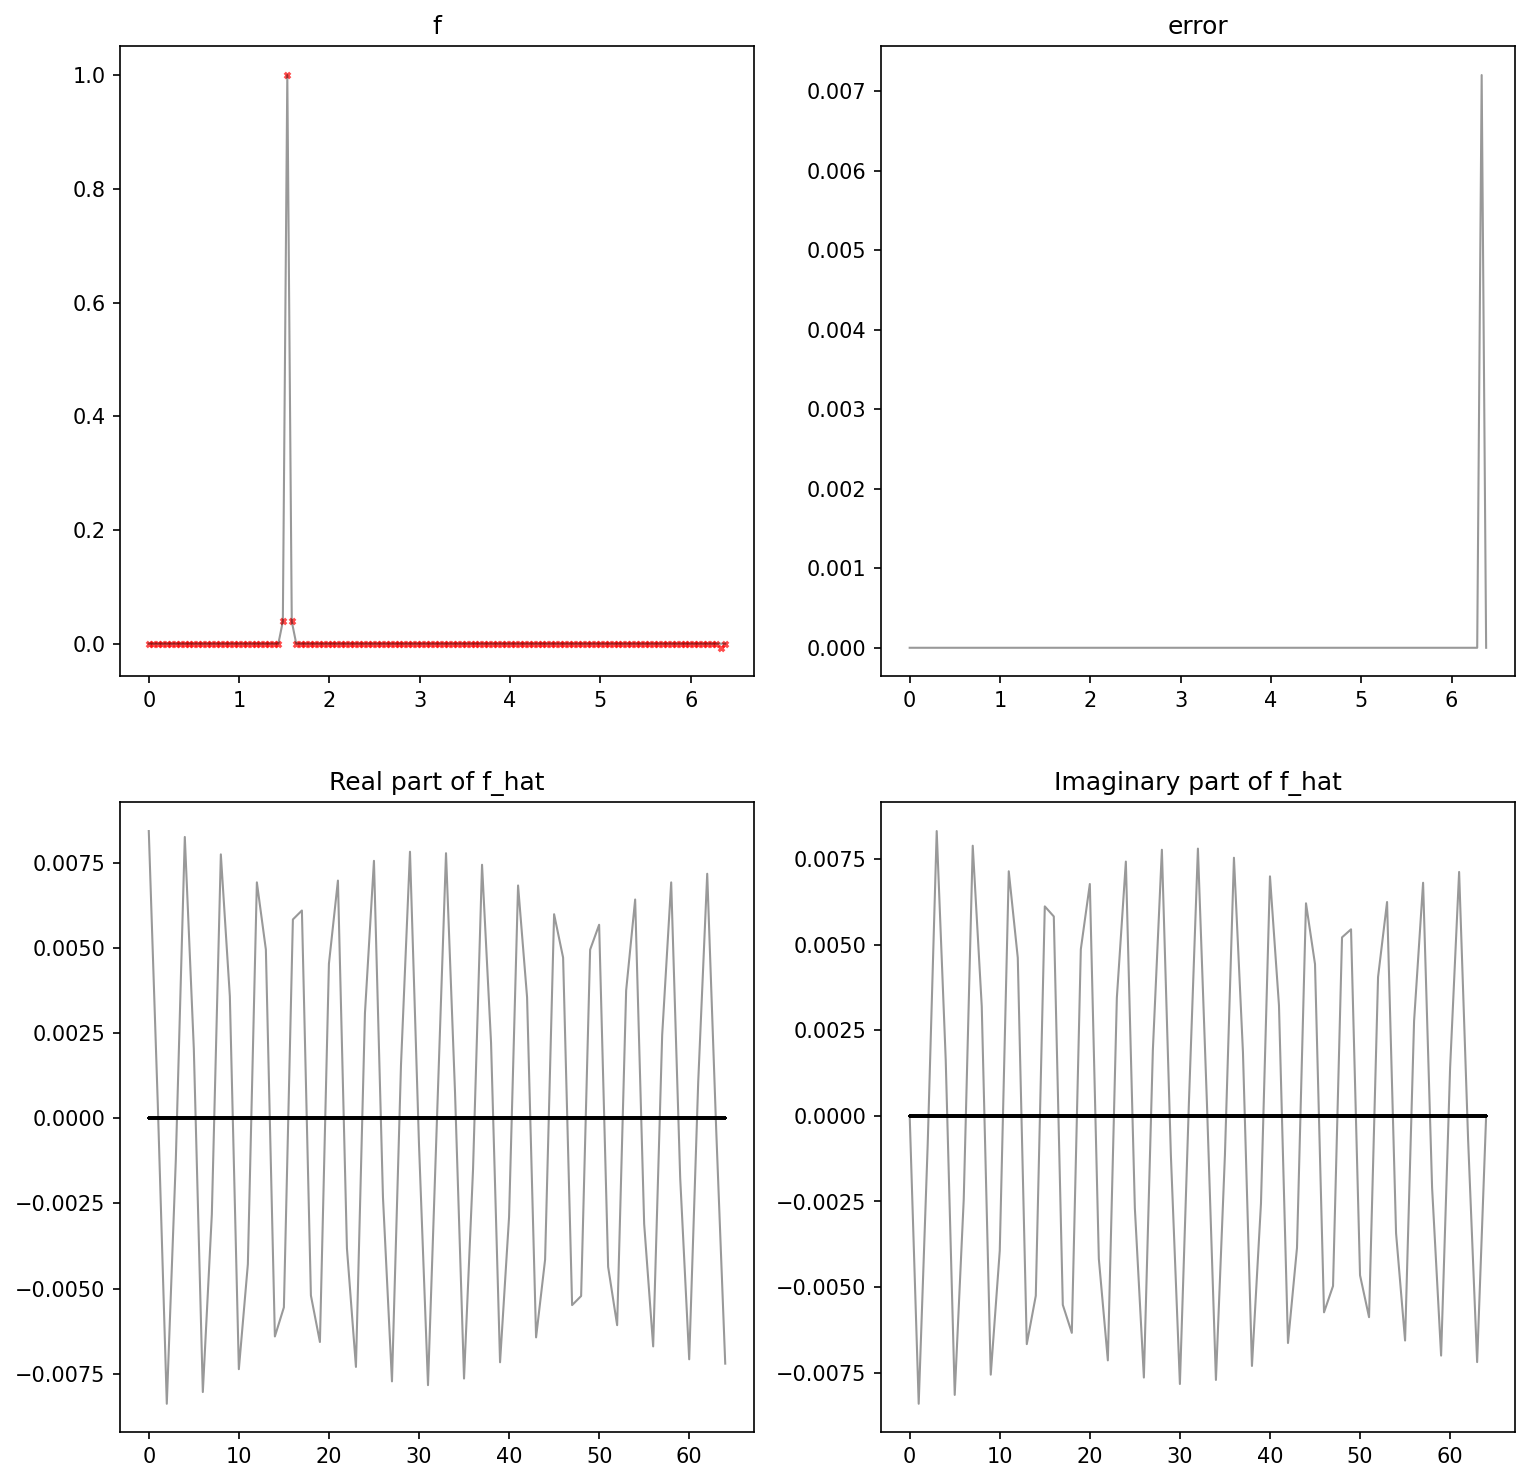

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12), dpi=150)
axes = axes.flatten()
axes[0].plot(ld, origin_f[:, 0], label='original', color='black', alpha=0.4, linewidth=1)
axes[0].scatter(ld, f[:, 0], label='reconstructed', marker='x', s=7, alpha=.7, color='red')
axes[0].set_title('f')
# axes[0].legend()

axes[1].plot(ld, origin_f[:, 0]- f[:, 0],label='error', color='black', alpha=0.4, linewidth=1)
axes[1].set_title('error')


axes[2].plot(half_kx, f_hat[::2], color='black', alpha=0.4, linewidth=1)
axes[2].set_title(r'Real part of f_hat')

axes[3].plot(half_kx, f_hat[1::2], color='black', alpha=0.4, linewidth=1)
axes[3].set_title(r'Imaginary part of f_hat')

# 2D

In [11]:
# TEST wavenumber
# Forward
f_hat_test = fft2(f[:-2, :])/dims[0]/dims[1]

# Inverse
f_hat_half = f_hat[::2, :] + 1j*f_hat[1::2, :]
f_hat_full = np.append(f_hat_half[:-1, :], np.conjugate(f_hat_half[:0:-1, :]), axis=0)
f_test = ifft2(f_hat_full)

/home/zyou6474/Projects/ERI/.venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


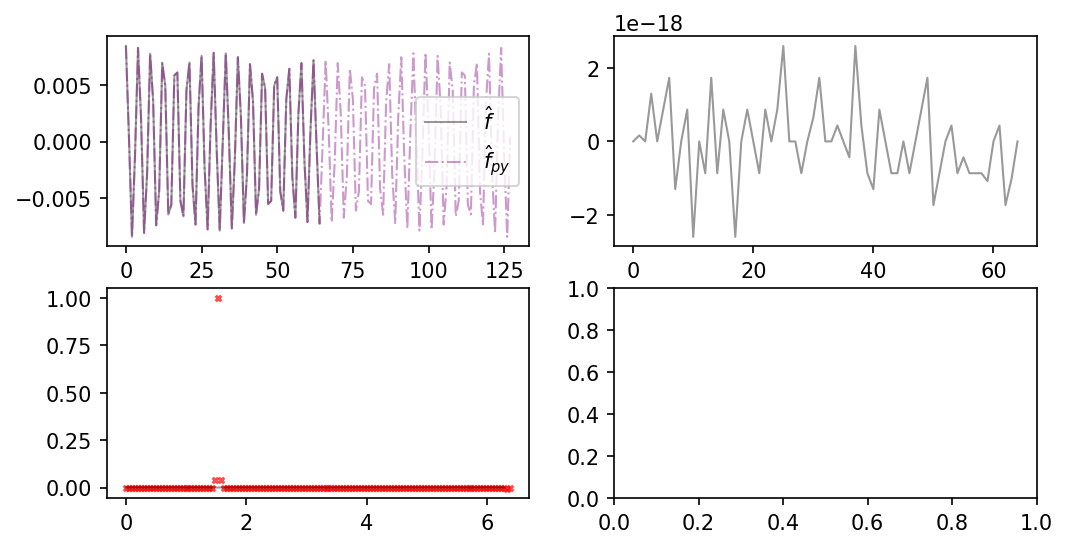

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(8, 4), dpi=150)
axes = axes.flatten()
axes[0].plot(half_kx, f_hat[::2, 0], color='black', alpha=0.4, linewidth=1, label='$\hat{f}$')
axes[0].plot(fk_x[:-2], f_hat_test[:, 0], color='purple', alpha=0.4, linewidth=1, label='$\hat{f}_{py}$', linestyle='-.')
axes[0].legend()

error = f_hat[::2, 0] - f_hat_test[:65, 0]
axes[1].plot(half_kx, error, color='black', alpha=0.4, linewidth=1, label='$\hat{f}$')

axes[2].plot(ld[:-2], f_test[:, 0], label='reconstructed', color='black', alpha=0.4, linewidth=1)
axes[2].scatter(ld, f[:, 0], label='reconstructed', marker='x', s=7, alpha=.7, color='red')